In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
f_birth = pd.read_csv('daily-total-female-births-CA.csv', index_col = [0], parse_dates = [0])

In [6]:
f_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [7]:
series_value = f_birth.values

In [8]:
f_birth.size

365

In [9]:
f_birth.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [10]:
f_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


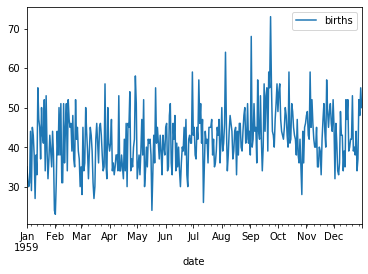

In [12]:
f_birth.plot()

In [19]:
f_birth_mean = f_birth.rolling(window = 15).mean()

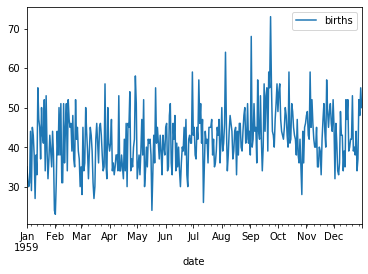

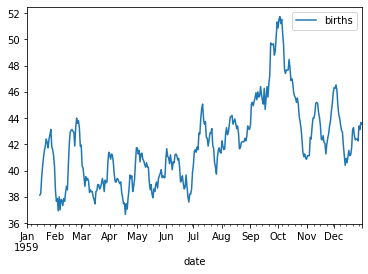

In [20]:
f_birth.plot()
f_birth_mean.plot()

In [21]:
value = pd.DataFrame(series_value)

In [22]:
birth_df = pd.concat([value, value.shift(1)], axis = 1)

In [26]:
birth_df.columns = ['Actual_births', 'Forecasted_births']

In [27]:
birth_df.head()

,Actual_births,Forecasted_births
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0


In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [33]:
birth_test = birth_df[1:]
birth_test.head()

,Actual_births,Forecasted_births
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [30]:
birth_error = mean_squared_error(birth_test.Actual_births, birth_test.Forecasted_births)

In [31]:
birth_error

84.22252747252747

In [32]:
np.sqrt(birth_error)

9.177283229394606

In [ ]:
# ARIMA - autoregressive integrated moving average

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

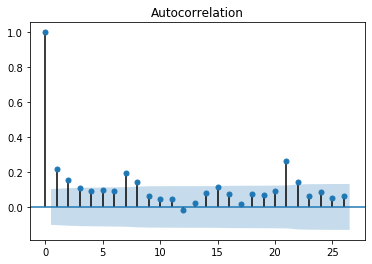

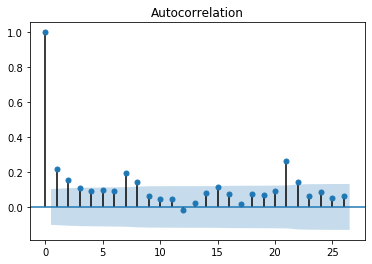

In [36]:
# plot_acf is to identify paramaeter Q

plot_acf(f_birth)

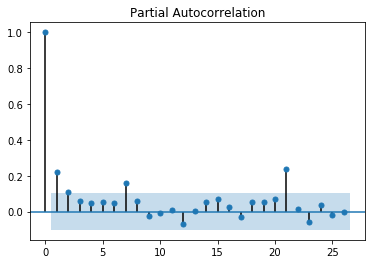

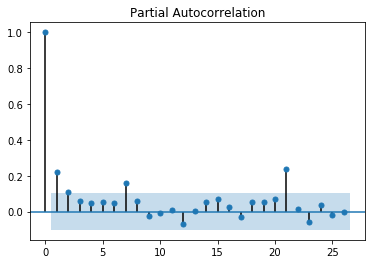

In [37]:
# plot_pacf is to identify paramaeter p

plot_pacf(f_birth)

In [39]:
# p = 2,3 : d = 0,1 : Q = 3,4
f_birth.size

365

In [40]:
birth_train = f_birth[0:330]
birth_test = f_birth[330:]

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [76]:
birth_model = ARIMA(birth_train, order=(3,1,4))

C:\Users\Nirvan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Nirvan\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [77]:
birth_model_fit = birth_model.fit()

In [78]:
birth_model_fit.aic

2225.0232037978744

In [81]:
birth_forecast = birth_model_fit.forecast(steps = 35)[0]

In [48]:
birth_forecast

array([45.3038922 , 46.31122153, 43.64946781, 44.59227023, 46.49761057,
       44.34368635, 44.08989131, 46.34436627, 45.07570264, 43.88115686,
       45.9525217 , 45.69620023, 43.97417145, 45.45706017, 46.10422711,
       44.31163746, 44.99264431, 46.26063127, 44.79383341, 44.66507992,
       46.18615449, 45.30679971, 44.53362442, 45.94712564, 45.74888677,
       44.60610284, 45.63384134, 46.0503001 , 44.84575066, 45.33743272,
       46.18265077, 45.18639168, 45.13038013, 46.1581363 , 45.55135045])

In [50]:
birth_test

,births
date,
1959-11-27,51
1959-11-28,46
1959-11-29,44
1959-11-30,52
1959-12-01,45
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34


In [82]:
np.sqrt(mean_squared_error(birth_test, birth_forecast))

6.61740927869701